In [1]:
# Import the required packages.
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import mdof

# (1) Load Files

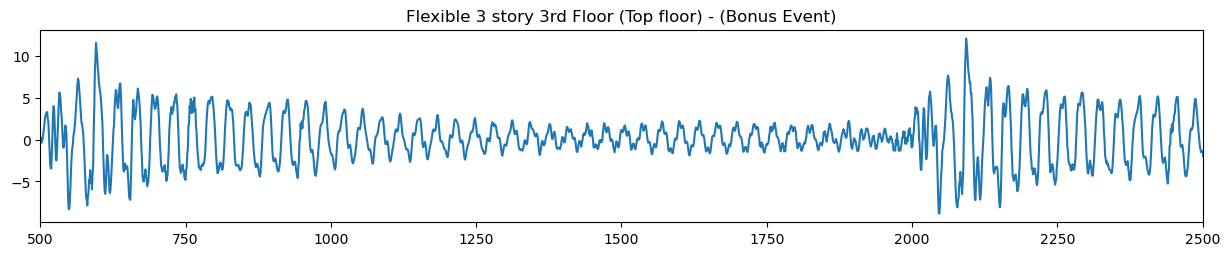

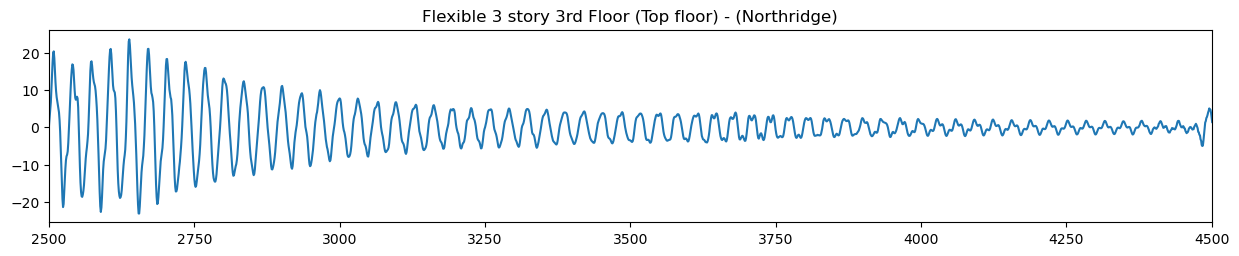

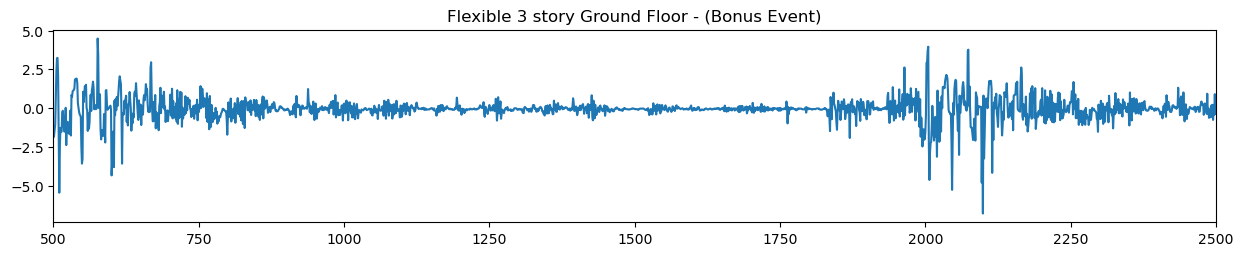

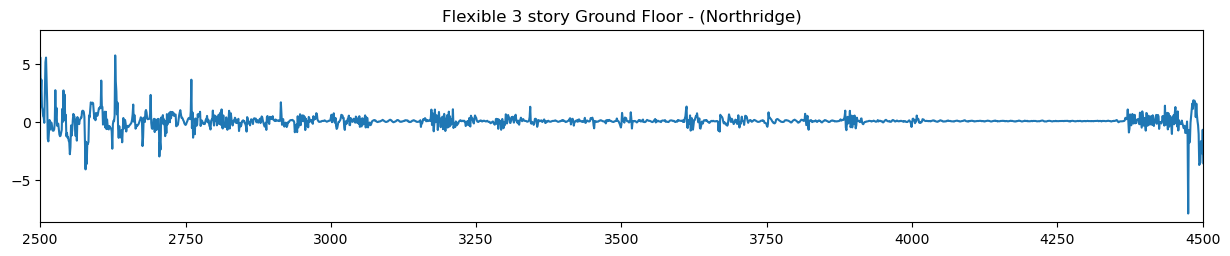

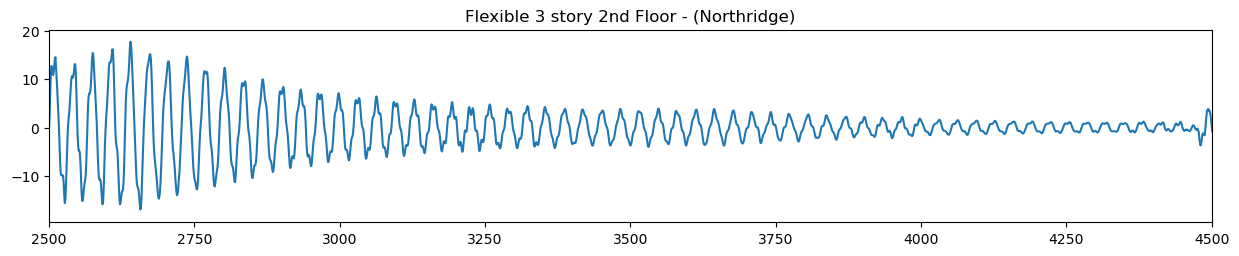

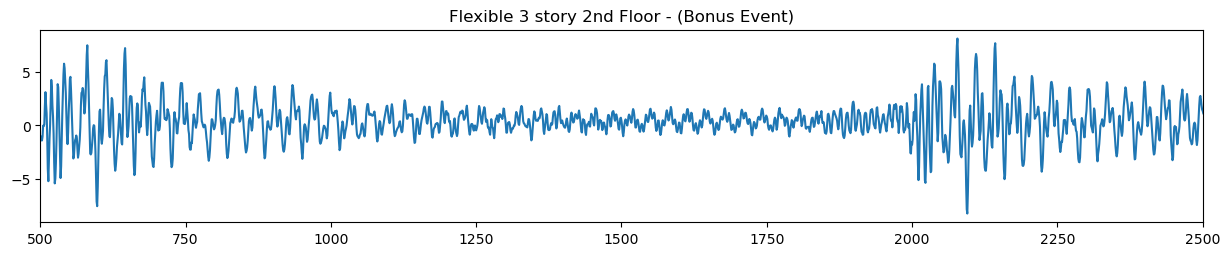

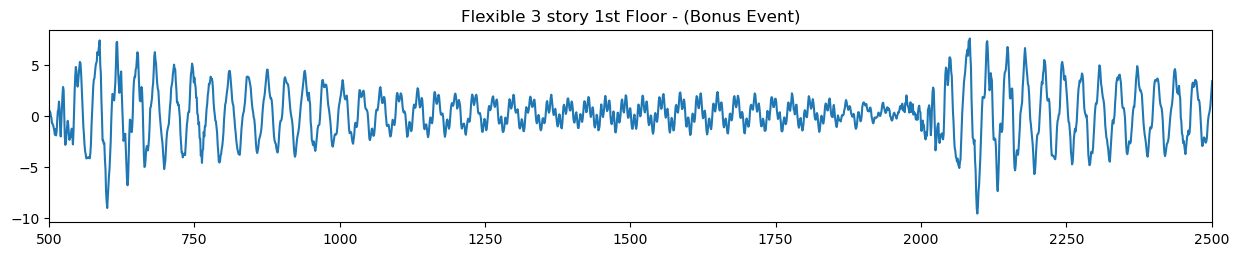

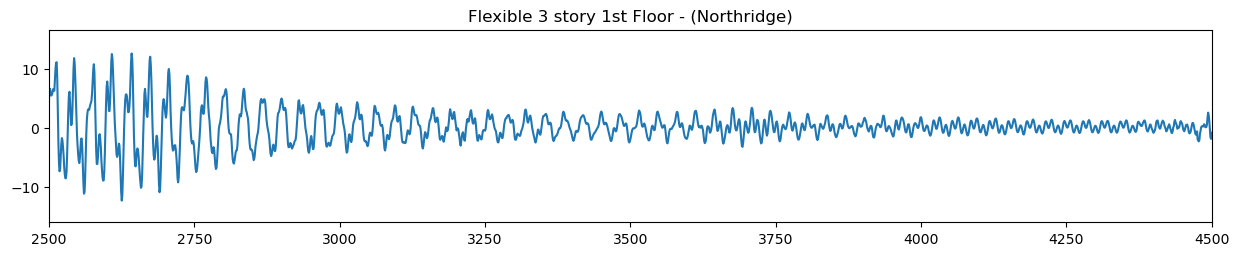

In [2]:
# Path to the directory where files are saved
DATA_DIR = Path("../../uploads/mini_shake_table/Flexible vs. Stiff")
# Get all the files ending in csv
files = list(DATA_DIR.glob("**/*.csv"))
# Identify the row with the column labels
header_row = 8
# Get the column labels
with open(files[0], "r") as readfile:
    header_keys = readfile.readlines()[header_row-1].split(',')
# Identify the column indices for each acceleration component
x_index = header_keys.index('Acc_X')
y_index = header_keys.index('Acc_Y')
z_index = header_keys.index('Acc_Z')

# Populate a dictionary with the data. Each file is its own item.
# data = {}
for file in files:
    filename = f"{file.parent.parent.name} {file.parent.name} - {file.name.split(')')[0]})"
    if "Flexible" in filename and ("Northridge" in filename or "Bonus" in filename):
        data = np.loadtxt(file,
                        delimiter=",",
                        skiprows=header_row, # Get all the rows after the header
                        usecols=[x_index,y_index,z_index] # Get only the columns with acceleration data
                        )
        fig,ax = plt.subplots(figsize=(15,2.5))
        ax.plot(data[:,0])
        ax.set_title(filename)
        if "Bonus" in filename:
            ax.set_xlim(500,2500)
        else:
            ax.set_xlim(2500,4500)
        # data[filename] = np.loadtxt(file,
        #                             delimiter=",",
        #                             skiprows=header_row, # Get all the rows after the header
        #                             usecols=[x_index,y_index,z_index] # Get only the columns with acceleration data
        #                            )